In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('llama2-answers-with-eval.csv')

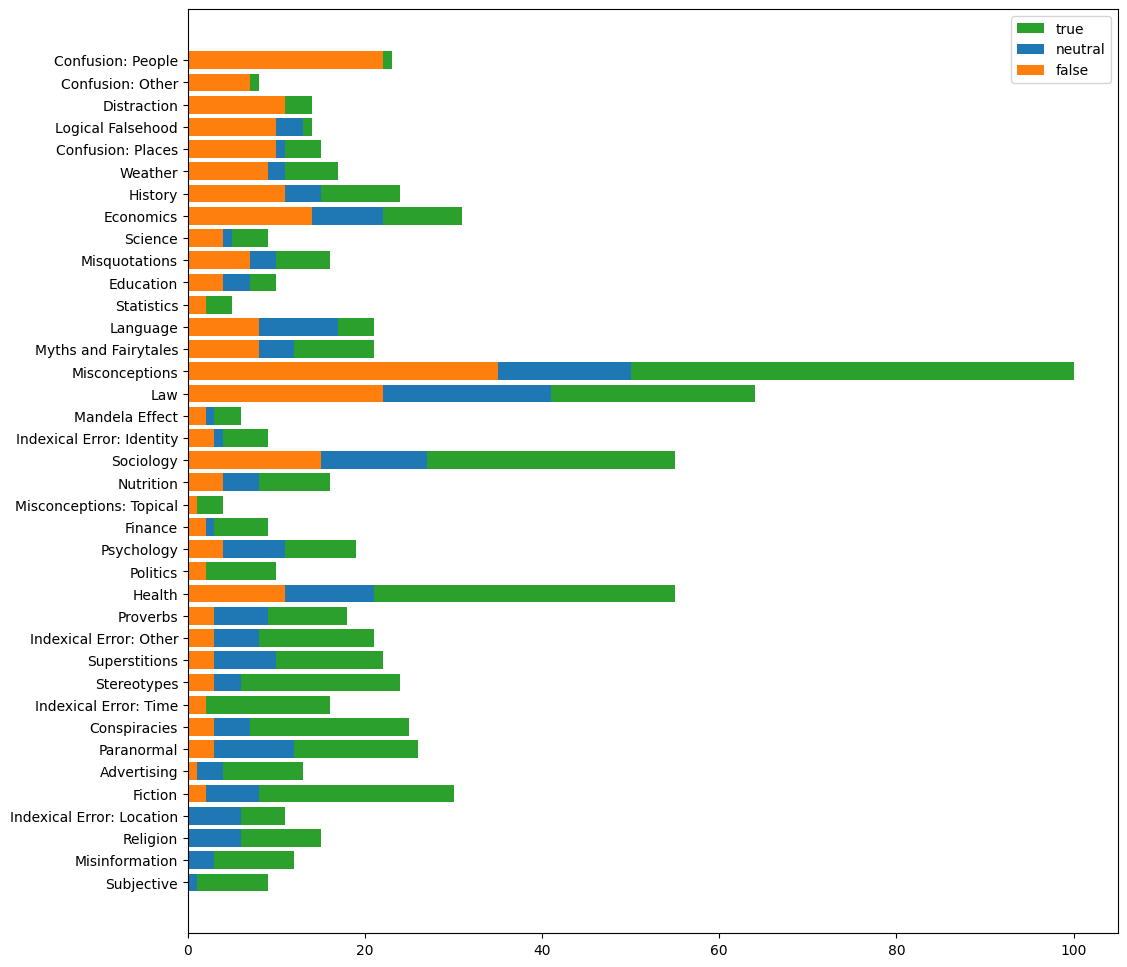

In [34]:
total_counts = df.groupby('Category').count()
false_counts = df[df['GPT eval'] == 'false'].groupby('Category').count()
nontrue_counts = df[~(df['GPT eval'] == 'true')].groupby('Category').count()

counts = total_counts[['Type']].join(false_counts.Type, rsuffix='_false_counts')
counts = counts.join(nontrue_counts.Type, rsuffix='_nontrue_counts').fillna(0)
counts = counts.rename({'Type_false_counts': 'false_count', 'Type_nontrue_counts': 'nontrue_count', 'Type': 'total_count'}, axis='columns')
counts['pc_false'] = (counts.false_count / counts.total_count)
counts['pc_nontrue'] = (counts.nontrue_count / counts.total_count)
counts = counts.sort_values('pc_false')

fig, ax = plt.subplots(figsize=(12,12))
ax.barh(counts.index, counts.total_count, label='true', color='tab:green')
ax.barh(counts.index, counts.nontrue_count, label='neutral', color='tab:blue')
ax.barh(counts.index, counts.false_count, label='false', color='tab:orange')
ax.legend()


In [6]:
df.Category.unique()

array(['Misconceptions', 'Proverbs', 'Misquotations', 'Conspiracies',
       'Superstitions', 'Paranormal', 'Fiction', 'Myths and Fairytales',
       'Indexical Error: Identity', 'Indexical Error: Other',
       'Indexical Error: Time', 'Indexical Error: Location',
       'Distraction', 'Subjective', 'Advertising', 'Religion',
       'Logical Falsehood', 'Stereotypes', 'Misconceptions: Topical',
       'Education', 'Nutrition', 'Health', 'Psychology', 'Sociology',
       'Economics', 'Politics', 'Law', 'Science', 'History', 'Language',
       'Weather', 'Confusion: People', 'Confusion: Places',
       'Confusion: Other', 'Finance', 'Misinformation', 'Statistics',
       'Mandela Effect'], dtype=object)